In [70]:
import pandas as pd
import numpy as np

In [71]:
data = pd.read_csv('Copper.csv')
data.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,4.04,28.0,1,5,10.0,0.65,1500.0,1670798778,2021-07-01,9.41
1,2021-04-01,6.78,25.0,1,5,41.0,-0.23,1210.0,1668701718,2021-04-01,9.79
2,2021-04-01,6.06,30.0,1,6,28.0,-1.06,952.0,628377,2021-01-01,8.88
3,2021-04-01,5.39,32.0,1,3,59.0,0.77,1317.0,1668701718,2021-01-01,9.21
4,2021-04-01,6.80,28.0,1,5,10.0,1.23,1984.5,640665,2021-03-01,8.68


# Handling the imbalanced Target variable with SMOTE

In [72]:
data['status'].value_counts()

status
1    115997
0     34436
Name: count, dtype: int64

This shows our target variable is highly imbalanced. Thus using the SMOTE technique to oversample the minority data

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['item_date'] = le.fit_transform(data['item_date'])

In [74]:
data.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,247,4.04,28.0,1,5,10.0,0.65,1500.0,1670798778,2021-07-01,9.41
1,247,6.78,25.0,1,5,41.0,-0.23,1210.0,1668701718,2021-04-01,9.79
2,247,6.06,30.0,1,6,28.0,-1.06,952.0,628377,2021-01-01,8.88
3,247,5.39,32.0,1,3,59.0,0.77,1317.0,1668701718,2021-01-01,9.21
4,247,6.80,28.0,1,5,10.0,1.23,1984.5,640665,2021-03-01,8.68


In [75]:
data['delivery date'] = pd.to_datetime(data['delivery date']).dt.year

In [76]:
data.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,247,4.04,28.0,1,5,10.0,0.65,1500.0,1670798778,2021,9.41
1,247,6.78,25.0,1,5,41.0,-0.23,1210.0,1668701718,2021,9.79
2,247,6.06,30.0,1,6,28.0,-1.06,952.0,628377,2021,8.88
3,247,5.39,32.0,1,3,59.0,0.77,1317.0,1668701718,2021,9.21
4,247,6.80,28.0,1,5,10.0,1.23,1984.5,640665,2021,8.68


In [77]:
X = data.drop('status', axis=1)
y = data['status']

In [78]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy="auto",random_state=40)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X, y)

In [79]:
oversampled_Y.value_counts()

status
1    115997
0    115997
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pickle

In [81]:
X_train, X_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=0.3, random_state=42)

# 1. Random Forest Classifier Model

In [82]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [83]:
rf_train_pred = rfc.predict(X_train)
rf_test_pred = rfc.predict(X_test)

In [84]:
print("RANDOM FOREST")
print("-------------------")
print("Train_data Classification report:","\n",classification_report(y_train,rf_train_pred))
print("-------------------------------------------------------------------------")
print("Train data confusion matrix:","\n",confusion_matrix(y_train,rf_train_pred))

RANDOM FOREST
-------------------
Train_data Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     81096
           1       1.00      1.00      1.00     81299

    accuracy                           1.00    162395
   macro avg       1.00      1.00      1.00    162395
weighted avg       1.00      1.00      1.00    162395

-------------------------------------------------------------------------
Train data confusion matrix: 
 [[81096     0]
 [    2 81297]]


In [85]:
print("RANDOM FOREST","\n","-------------------")
print("Test_data Classification report:","\n",classification_report(y_test,rf_test_pred))
print("-------------------------------------------------------------------------")
print("Test data confusion matrix:","\n",confusion_matrix(y_test,rf_test_pred))

RANDOM FOREST 
 -------------------
Test_data Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     34901
           1       0.98      0.96      0.97     34698

    accuracy                           0.97     69599
   macro avg       0.97      0.97      0.97     69599
weighted avg       0.97      0.97      0.97     69599

-------------------------------------------------------------------------
Test data confusion matrix: 
 [[34183   718]
 [ 1500 33198]]


# 2. Decision Tree Classifier

In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
dt_train_pred = dtree.predict(X_train)
dt_test_pred = dtree.predict(X_test)

In [22]:
print("DECISION TREES","\n","------------------------")
print("Train_data Classification report:","\n",classification_report(y_train,dt_train_pred))
print("-------------------------------------------------------------------------")
print("Train data confusion matrix:","\n",confusion_matrix(y_train,dt_train_pred))

DECISION TREES 
 ------------------------
Train_data Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     81096
           1       1.00      1.00      1.00     81299

    accuracy                           1.00    162395
   macro avg       1.00      1.00      1.00    162395
weighted avg       1.00      1.00      1.00    162395

-------------------------------------------------------------------------
Train data confusion matrix: 
 [[81096     0]
 [    2 81297]]


In [23]:
print("DECISION TREES","\n","------------------------")
print("Test_data Classification report:","\n",classification_report(y_test,dt_test_pred))
print("-------------------------------------------------------------------------")
print("Test data confusion matrix:","\n",confusion_matrix(y_test,dt_test_pred))

DECISION TREES 
 ------------------------
Test_data Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     34901
           1       0.95      0.94      0.95     34698

    accuracy                           0.95     69599
   macro avg       0.95      0.95      0.95     69599
weighted avg       0.95      0.95      0.95     69599

-------------------------------------------------------------------------
Test data confusion matrix: 
 [[33062  1839]
 [ 1956 32742]]


#3.Logistic Regression

In [57]:
logm = LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression()

In [58]:
train_pred = logm.predict(X_train)
test_pred = logm.predict(X_test)

In [59]:
print("LOGISTIC REGRESSION","\n","----------------------")
print("Train_data Classification report:","\n",classification_report(y_train,train_pred))
print("-------------------------------------------------------------------------")
print("Train data confusion matrix:","\n",confusion_matrix(y_train,train_pred))

LOGISTIC REGRESSION 
 ----------------------
Train_data Classification report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     81096
           1       0.00      0.00      0.00     81299

    accuracy                           0.50    162395
   macro avg       0.25      0.50      0.33    162395
weighted avg       0.25      0.50      0.33    162395

-------------------------------------------------------------------------
Train data confusion matrix: 
 [[81096     0]
 [81299     0]]


C:\Users\aquib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aquib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aquib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [60]:
print("LOGISTIC REGRESSION","\n","----------------------")
print("Test_data Classification report:","\n",classification_report(y_test,test_pred))
print("-------------------------------------------------------------------------")
print("Test data confusion matrix:","\n",confusion_matrix(y_test,test_pred))

LOGISTIC REGRESSION 
 ----------------------
Test_data Classification report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     34901
           1       0.00      0.00      0.00     34698

    accuracy                           0.50     69599
   macro avg       0.25      0.50      0.33     69599
weighted avg       0.25      0.50      0.33     69599

-------------------------------------------------------------------------
Test data confusion matrix: 
 [[34901     0]
 [34698     0]]


C:\Users\aquib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aquib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aquib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# 4. XGB classfier

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [62]:
import sklearn
import imblearn
print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.6.1
imbalanced-learn version: 0.13.0


In [63]:
xgb.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

In [65]:
print("XGBoost ","\n","----------------------")
print("Train_data Classification report:","\n",classification_report(y_train,train_pred))
print("-------------------------------------------------------------------------")
print("Train data confusion matrix:","\n",confusion_matrix(y_train,train_pred))

XGBoost  
 ----------------------
Train_data Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     81096
           1       0.94      0.92      0.93     81299

    accuracy                           0.93    162395
   macro avg       0.93      0.93      0.93    162395
weighted avg       0.93      0.93      0.93    162395

-------------------------------------------------------------------------
Train data confusion matrix: 
 [[76635  4461]
 [ 6802 74497]]


In [66]:
print("XGBoost","\n","----------------------")
print("Test_data Classification report:","\n",classification_report(y_test,test_pred))
print("-------------------------------------------------------------------------")
print("Test data confusion matrix:","\n",confusion_matrix(y_test,test_pred))

XGBoost 
 ----------------------
Test_data Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     34901
           1       0.94      0.91      0.92     34698

    accuracy                           0.92     69599
   macro avg       0.92      0.92      0.92     69599
weighted avg       0.92      0.92      0.92     69599

-------------------------------------------------------------------------
Test data confusion matrix: 
 [[32717  2184]
 [ 3228 31470]]


In [86]:
FP,TP,threshold = roc_curve(y_true=y_test, y_score=rf_test_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9680986831044436


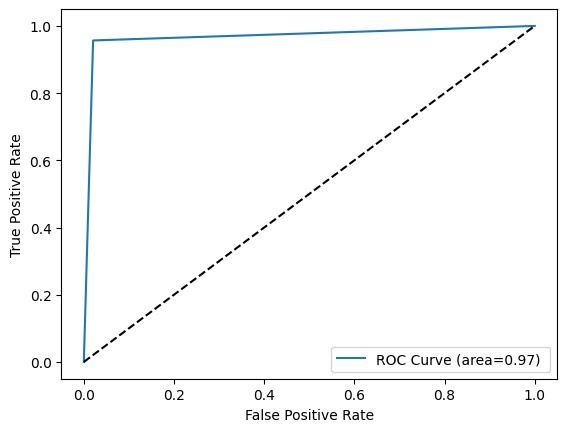

In [87]:
import matplotlib.pyplot as plt
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

From the above classification reports RandomForestClassifier model performs better compared to other models. ROC AUC score of 97% indicates the model can efficiently distinguish between the positive and negative classes.

In [88]:
import pickle
with open('rf_model.pkl','wb') as file:
    pickle.dump(rfc,file)